In [2]:
# pip install opencv-python

In [4]:
# python3 -c "import cv2"

SyntaxError: ignored

In [25]:

import numpy as np
import cv2


In [113]:

image = cv2.imread("slant2.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

ddepth = cv2.CV_32F


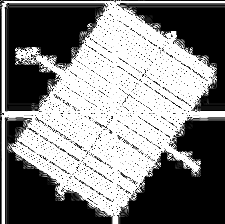

array([[  0, 142,  68, ...,   0,   0,   0],
       [152,   6,  48, ..., 255, 255, 255],
       [  8,  26,  34, ..., 255, 255, 255],
       ...,
       [  0,  96, 255, ...,   0,   0,   0],
       [  0,  96, 255, ...,   0,   0,   0],
       [  0,  96, 255, ...,   0,   0,   0]], dtype=uint8)

In [110]:

gradX = cv2.Sobel(gray, ddepth=ddepth, dx=1, dy=0, ksize=-1)

cv2_imshow(gradX)
# gradient

In [ ]:
gradY = cv2.Sobel(gray, ddepth=ddepth, dx=0, dy=1, ksize=-1)



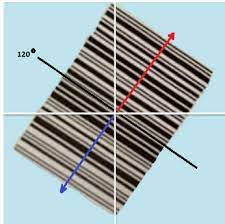

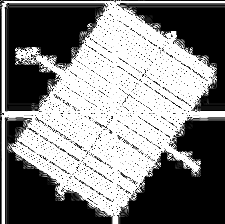

array([[  0, 142,  68, ...,   0,   0,   0],
       [152,   6,  48, ..., 255, 255, 255],
       [  8,  26,  34, ..., 255, 255, 255],
       ...,
       [  0,  96, 255, ...,   0,   0,   0],
       [  0,  96, 255, ...,   0,   0,   0],
       [  0,  96, 255, ...,   0,   0,   0]], dtype=uint8)

In [72]:

gradient = cv2.subtract(gradX, gradY)
gradient = cv2.convertScaleAbs(gradient)
cv2_imshow(gradient)
gradient

cv2_imshow(gradient)
gradient

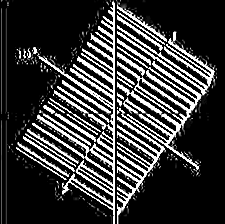

array([[  0, 142,  68, ...,   0,   0,   0],
       [152,   6,  48, ..., 255, 255, 255],
       [  8,  26,  34, ..., 255, 255, 255],
       ...,
       [  0,  96, 255, ...,   0,   0,   0],
       [  0,  96, 255, ...,   0,   0,   0],
       [  0,  96, 255, ...,   0,   0,   0]], dtype=uint8)

In [105]:
cv2_imshow(gradX)
gradient

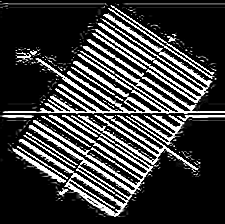

array([[  0, 142,  68, ...,   0,   0,   0],
       [152,   6,  48, ..., 255, 255, 255],
       [  8,  26,  34, ..., 255, 255, 255],
       ...,
       [  0,  96, 255, ...,   0,   0,   0],
       [  0,  96, 255, ...,   0,   0,   0],
       [  0,  96, 255, ...,   0,   0,   0]], dtype=uint8)

In [104]:
cv2_imshow(gradY)
gradient

In [114]:
# blur and threshold the image
blurred = cv2.blur(gradient, (9, 9))
(_, thresh) = cv2.threshold(blurred, 200, 255, cv2.THRESH_BINARY)

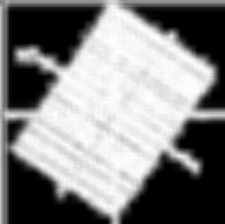

In [95]:
cv2_imshow(blurred)
# gradient

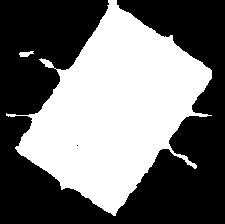

In [96]:
cv2_imshow(thresh)
# gradient

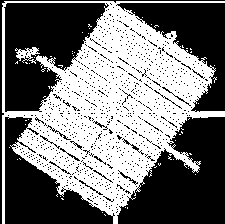

In [92]:
cv2_imshow(thresh)
# gradient

In [115]:
# construct a closing kernel and apply it to the thresholded image
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7,21) ) #  (21, 7))
closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
# https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_morphological_ops/py_morphological_ops.html

In [116]:
# perform a series of erosions and dilations
closed = cv2.erode(closed, None, iterations = 8)


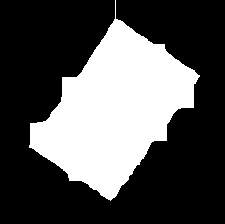

In [117]:
cv2_imshow(closed)

In [118]:
closed = cv2.dilate(closed, None, iterations = 8)

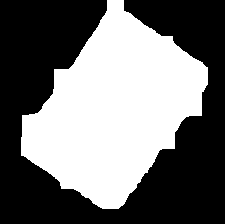

array([[  0, 142,  68, ...,   0,   0,   0],
       [152,   6,  48, ..., 255, 255, 255],
       [  8,  26,  34, ..., 255, 255, 255],
       ...,
       [  0,  96, 255, ...,   0,   0,   0],
       [  0,  96, 255, ...,   0,   0,   0],
       [  0,  96, 255, ...,   0,   0,   0]], dtype=uint8)

In [119]:
cv2_imshow(closed)
gradient

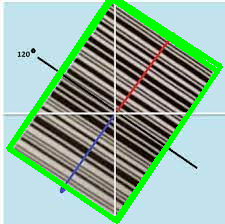

-1

In [81]:
# find the contours in the thresholded image, then sort the contours
# by their area, keeping only the largest one
import argparse
import imutils

cnts = cv2.findContours(closed.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
c = sorted(cnts, key = cv2.contourArea, reverse = True)[0]
# compute the rotated bounding box of the largest contour
rect = cv2.minAreaRect(c)
box = cv2.cv.BoxPoints(rect) if imutils.is_cv2() else cv2.boxPoints(rect)
box = np.int0(box)
# draw a bounding box arounded the detected barcode and display the
# image
cv2.drawContours(image, [box], -1, (0, 255, 0), 3)
from google.colab.patches import cv2_imshow
cv2_imshow(image)
# cv2.imshow(image)

cv2.waitKey(0)